<a href="https://colab.research.google.com/github/tarasov001/ml/blob/main/Employee_promotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%autosave 10

Autosaving every 10 seconds


# 0. Описание задачи

У крупных организаций существует проблема - определения людей для продвижения и своевременная подготовка к новым должностям.

Окончательные предложения делаются сотрдникам только после долгой оценки его работы, что приводит к задержке перехода к новым должностям. Следовательно, компании нужна помощь в определении подходящих кандидатов на повышение, чтобы они могли ускорить весь цикл продвижения.

# 1. Загрузка данных

In [28]:
data = pd.read_csv("data.csv")

data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


In [29]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

employee_id: Уникальный ID номер сотрудника\
department: Отдел\
region: Регион\
education: Образование\
gender: Пол\
recruitment_channel: Канал найма\
no_ of_ trainings: Количество пройденных сотрудником тренингов в прошлом году\
age: Возраст\
previous_ year_ rating: Рейтинг сотрудника в прошлом году\
Стаж: Length of service in years\
awards_ won: Есть ли награды в прошлом году (1 - да, 0 - нет)\
avg_ training_ score: Средний балл по обучающим курсам\
is_promoted: Рекомендован к повышению или нет

In [30]:
data = data.rename(columns={'awards_won?' : 'awards_won'})

Удалим ненужный стобец данных с id номером каждого сотрудника

In [31]:
data = data.drop(labels='employee_id', axis=1)
data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


In [32]:
data.corr()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.081278,-0.063126,-0.057275,-0.007628,0.042517,-0.024896
age,-0.081278,1.000000,0.006008,0.657111,-0.008169,-0.048380,-0.017166
previous_year_rating,-0.063126,0.006008,1.000000,0.000253,0.027738,0.075139,0.159320
length_of_service,-0.057275,0.657111,0.000253,1.000000,-0.039927,-0.038122,-0.010670
awards_won,-0.007628,-0.008169,0.027738,-0.039927,1.000000,0.072138,0.195871
avg_training_score,0.042517,-0.048380,0.075139,-0.038122,0.072138,1.000000,0.181147
is_promoted,-0.024896,-0.017166,0.159320,-0.010670,0.195871,0.181147,1.000000


# 2. Описательная статистика

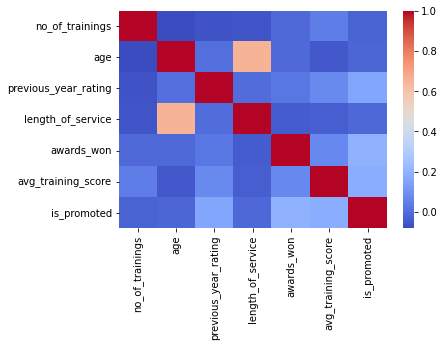

In [33]:
sns.heatmap(data.corr(), cmap='coolwarm')

# 3. Поиск и обработка пропущенных значений

Посмотрим сколько пропцщенных значений в каждом столбце

In [34]:
data.isna().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [35]:
data.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [36]:
data.previous_year_rating.unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

В столбце education вероятнее всего пропущенные значения означают отсутствие образования совсем\
Также можно сделать предположение, что работники, у которых в столбце previous_year_rating пустое значение, работают первый год

Заполним пустые значения в столбцах:

In [37]:
data.education = data.education.fillna('Without education')

In [38]:
data.education.unique()

array(["Master's & above", "Bachelor's", 'Without education',
       'Below Secondary'], dtype=object)

In [39]:
data.previous_year_rating = data.previous_year_rating.fillna(0.0)

In [40]:
data.previous_year_rating.unique()

array([5., 3., 1., 4., 0., 2.])

Строки с пропущенными значениями последних 4 признаков можно удалить, так как к значимой потере данных это никак не приведет

In [41]:
data.dropna()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,Sales & Marketing,region_9,Without education,m,sourcing,1,29,1.0,2,0,45,0


# 4. Обработка категориальных признаков

In [42]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [43]:
from sklearn.preprocessing import OrdinalEncoder

In [44]:
ordinal_encoder = OrdinalEncoder()

In [45]:
data[object_cols] = ordinal_encoder.fit_transform(data[object_cols])

In [46]:
ordinal_encoder.categories_

[array(['Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
        'R&D', 'Sales & Marketing', 'Technology'], dtype=object),
 array(['region_1', 'region_10', 'region_11', 'region_12', 'region_13',
        'region_14', 'region_15', 'region_16', 'region_17', 'region_18',
        'region_19', 'region_2', 'region_20', 'region_21', 'region_22',
        'region_23', 'region_24', 'region_25', 'region_26', 'region_27',
        'region_28', 'region_29', 'region_3', 'region_30', 'region_31',
        'region_32', 'region_33', 'region_34', 'region_4', 'region_5',
        'region_6', 'region_7', 'region_8', 'region_9'], dtype=object),
 array(["Bachelor's", 'Below Secondary', "Master's & above",
        'Without education'], dtype=object),
 array(['f', 'm'], dtype=object),
 array(['other', 'referred', 'sourcing'], dtype=object)]

In [47]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7.0,31.0,2.0,0.0,2.0,1,35,5.0,8,0,49,0
1,4.0,14.0,0.0,1.0,0.0,1,30,5.0,4,0,60,0
2,7.0,10.0,0.0,1.0,2.0,1,34,3.0,7,0,50,0
3,7.0,15.0,0.0,1.0,0.0,2,39,1.0,10,0,50,0
4,8.0,18.0,0.0,1.0,0.0,1,45,3.0,2,0,73,0


# 5. Нормализация данных

In [48]:
data.mean(axis=0), data.std(axis=0)

(department               4.972796
 region                  15.428970
 education                0.691176
 gender                   0.702379
 recruitment_channel      0.868158
 no_of_trainings          1.253011
 age                     34.803915
 previous_year_rating     3.078748
 length_of_service        5.865512
 awards_won               0.023172
 avg_training_score      63.386750
 is_promoted              0.085170
 dtype: float64, department               2.506046
 region                   8.764954
 education                1.010851
 gender                   0.457216
 recruitment_channel      0.980713
 no_of_trainings          0.609264
 age                      7.660169
 previous_year_rating     1.496458
 length_of_service        4.265094
 awards_won               0.150450
 avg_training_score      13.371559
 is_promoted              0.279137
 dtype: float64)

In [51]:
data_norm = (data - data.mean(axis=0)) / data.std(axis=0)
data_norm.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04,5.480800e+04
mean,-6.266537e-16,3.862242e-16,-1.768076e-16,-4.988347e-16,8.570015e-16,2.137098e-15,-3.489359e-16,-6.093992e-17,4.175880e-16,1.902468e-16,1.004605e-16,1.139711e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.984320e+00,-1.760303e+00,-6.837572e-01,-1.536209e+00,-8.852310e-01,-4.152724e-01,-1.932583e+00,-2.057356e+00,-1.140775e+00,-1.540163e-01,-1.823778e+00,-3.051190e-01
25%,-3.881797e-01,-5.053045e-01,-6.837572e-01,-1.536209e+00,-8.852310e-01,-4.152724e-01,-7.576746e-01,-7.208671e-01,-6.718521e-01,-1.540163e-01,-9.263504e-01,-3.051190e-01
50%,1.085537e-02,-1.630323e-01,-6.837572e-01,6.509413e-01,-8.852310e-01,-4.152724e-01,-2.354929e-01,-5.262266e-02,-2.029292e-01,-1.540163e-01,-2.532801e-01,-3.051190e-01
75%,8.089255e-01,6.356029e-01,1.294774e+00,6.509413e-01,1.154101e+00,-4.152724e-01,5.477796e-01,6.156218e-01,2.659936e-01,-1.540163e-01,9.432894e-01,-3.051190e-01
max,1.207961e+00,2.004692e+00,2.284040e+00,6.509413e-01,1.154101e+00,1.435665e+01,3.289233e+00,1.283866e+00,7.299836e+00,6.492699e+00,2.663358e+00,3.277350e+00


# 6. Отбор признаков

In [56]:
X = data_norm.drop(['is_promoted'], axis=1)

In [57]:
y = data.is_promoted

In [54]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

# 7. Обучение модели

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
model_k5 = KNeighborsClassifier(n_neighbors=5)
model_k5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [81]:
y_train_predict = model_k5.predict(X_train)
y_test_predict = model_k5.predict(X_test)

# 8. Метрика качества

In [82]:
from sklearn.metrics import mean_squared_error

In [84]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test = mean_squared_error(y_test, y_test_predict)
MSE_train, MSE_test

(0.07128893522742083, 0.08471690080885483)